In [ ]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from collections import Counter

<h3>L2 - метрика:</h3>

$$ d(a,b) = \sqrt{\sum_{i = 1}^{n}(a_i - b_i)^2 } $$

In [ ]:
#Вычисление l2-метрики
def norma(z):
  return np.sqrt(np.sum(z **2))


#Подсчет самого частого значения
def most_frequntly_value(sequence):
  temp_dictionary = {}

  for  element in sequence:
    if element not in temp_dictionary:
      temp_dictionary[element] = 0
    temp_dictionary[element] += 1

  mini = 0
  result = None
  for key,value in temp_dictionary.items():
    if value > mini:
      mini = value
      result = key

  return result

<h3> K-ближайших соседей (K-Nearest Neighbors, KNN)</h3> — алгоритм машинного обучения, который используется для задач классификации и регрессии.

<b>Основная идея KNN</b> заключается в том, что объект классифицируется на основе класса его ближайших соседей. Алгоритм основан на гипотезе компактности, которая предполагает, что расположенные близко друг к другу объекты в пространстве признаков имеют схожие значения целевой переменной или принадлежат к одному классу.

In [ ]:
import numpy as np

class KNNСlassifier:

  def __init__(self, k = 5):
    self.k = k

  def fit(self, X, y):
    #Запоминаем тестовую выборку
    self.X_train = X
    self.y_train = y

  def predict(self, X):
    pred = [self._predict(el) for el in X]
    return np.array(pred)

  #Вспомогательная функция
  def _predict(self, X):

    #Вычисление расстояния от одного объекта до всех тренировочных
    distantions = [norma(X - train) for train in self.X_train]
    #Берем к ближайших элементов
    k_ind = np.argsort(distantions)[:self.k]
    #Берем метрику этих элементов
    y_el = [self.y_train[i] for i in k_ind ]

    return most_frequntly_value(y_el)

<h3>Check quality:

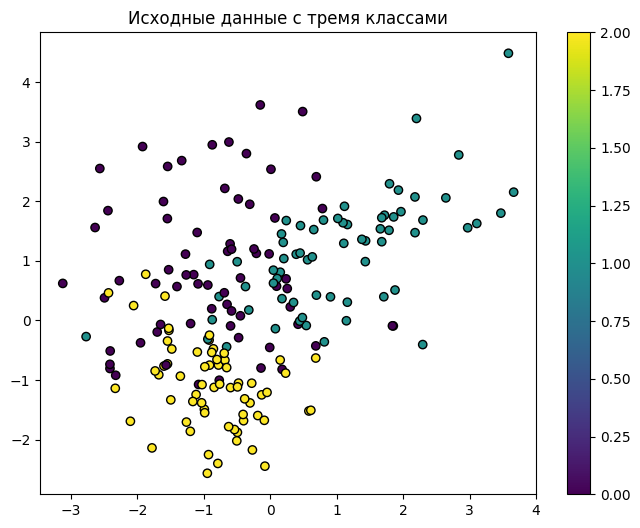

Accuracy: 0.80


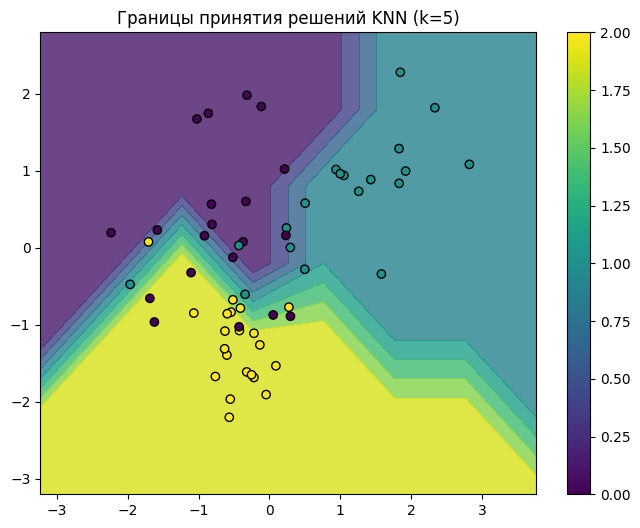

In [ ]:
# 1. Создаем синтетические данные
X, y = make_classification(n_samples=200, n_features=2, n_informative=2,
                          n_redundant=0, n_classes=3, n_clusters_per_class=1,
                          random_state=42)

# Визуализация данных
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k')
plt.title("Исходные данные с тремя классами")
plt.colorbar()
plt.show()

# 2. Разделяем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Масштабируем данные (важно для KNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 4. Создаем и обучаем модель KNN
knn = KNNСlassifier(k=5)
knn.fit(X_train, y_train)

# 5. Делаем предсказания
predictions = knn.predict(X_test)

# 6. Оцениваем точность
print(f"Accuracy: {accuracy_score(y_test, predictions):.2f}")

# 7. Визуализация границ принятия решений
def plot_decision_boundaries(X, y, model, k):
    h = 1  # Шаг сетки
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap='viridis')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='viridis')
    plt.title(f"Границы принятия решений KNN (k={k})")
    plt.colorbar()
    plt.show()

plot_decision_boundaries(X_test, y_test, knn, k=5)
